In [9]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plot 
from scipy import stats

# File to Load
spotify_data_load = Path("Resources/spotify_songs .csv")

# Read Data File and store into Pandas DataFrames
spotify_data= pd.read_csv(spotify_data_load)
spotify_data_drop = spotify_data.drop(columns =['track_id','track_album_id', 'playlist_id', 'track_album_name',
                                        'danceability', 'energy', 'mode', 'speechiness', 'acousticness',
                                        'instrumentalness', 'liveness', 'valence'])
# Show DateFrame
spotify_data_drop.head()

,track_name,track_artist,track_popularity,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,key,loudness,tempo,duration_ms
0,At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400
1,(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507
2,Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547
3,At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893
4,Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333


In [10]:
#Check 
spotify_data_drop.dtypes

track_name                   object
track_artist                 object
track_popularity              int64
track_album_release_date      int64
playlist_name                object
playlist_genre               object
playlist_subgenre            object
key                           int64
loudness                    float64
tempo                       float64
duration_ms                   int64
dtype: object

In [11]:
#Make it pretty 
spotify_df = spotify_data_drop.rename(columns={"track_name": "Track Name", "track_artist": "Artist", "track_popularity": "Popularity",
                          "track_album_release_date": "Release Date", "playlist_name": "Playlist Name",
                          "playlist_genre": "Genre", "playlist_subgenre": "Subgenre", "key": "Key",
                          "loudness": "Loudness","tempo": "Tempo", "duration_ms": "Duration (ms)"})
spotify_df = spotify_df.set_index(["Track Name"])

#Print data frame
spotify_df

,Artist,Popularity,Release Date,Playlist Name,Genre,Subgenre,Key,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,
At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507
Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547
At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893
Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333
...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,1978,This Is Scorpions,rock,hard rock,3,-6.118,142.665,407333
Wavelength - Remastered,Van Morrison,44,1978,Classic Rock Retrogamer,rock,classic rock,0,-6.999,142.829,346987
Der Mussolini - 1998 - Remaster,DAF,2,1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,-9.404,156.308,235107


In [12]:
#Define the number assignments of the key in letter form. 
#Create new column for the letter key
def key_assign(key):
    if key == 0:
        return("C")
    elif key == 1:
        return('C#')
    elif key == 2:
        return('D')
    elif key == 3:
        return('D#')
    elif key == 4:
        return('E')
    elif key == 5:
        return("F")
    elif key == 6:
        return('F#')
    elif key == 7:
        return('G')
    elif key == 8:
        return('G#')
    elif key == 9:
        return('A')
    elif key == 10:
        return('A#')
    elif key == 11:
        return('B')
    else:
        return('No Key Detected')

spotify_df["Key Assignment"] = spotify_df['Key'].apply(key_assign)

#Display new data frame
spotify_df

,Artist,Popularity,Release Date,Playlist Name,Genre,Subgenre,Key,Loudness,Tempo,Duration (ms),Key Assignment
Track Name,,,,,,,,,,,
At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400,F
(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507,B
Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547,G
At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893,F
Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333,A#
...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,1978,This Is Scorpions,rock,hard rock,3,-6.118,142.665,407333,D#
Wavelength - Remastered,Van Morrison,44,1978,Classic Rock Retrogamer,rock,classic rock,0,-6.999,142.829,346987,C
Der Mussolini - 1998 - Remaster,DAF,2,1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,-9.404,156.308,235107,F#


In [13]:
#Categorize and Establish Bins for Popularity
size_bins = (0, 30, 60, 90, 100)
labels = ['Least Popular (<30)', 'Low to Mid Popular (30-59)',
          'Mid to High Popular (60-89)','Most Popular (90-100)'] 

spotify_df["Popularity Sectors"] = pd.cut(spotify_df["Popularity"],size_bins, labels=labels)

#Organize Columns
spotify_df =spotify_df.reindex(columns=['Artist', 'Popularity', 'Popularity Sectors', 'Release Date',
                                       'Playlist Name', 'Genre', 'Subgenre', 'Key', 'Key Assignment',
                                       'Loudness', 'Tempo', 'Duration (ms)'])
#Print data frame
spotify_df

,Artist,Popularity,Popularity Sectors,Release Date,Playlist Name,Genre,Subgenre,Key,Key Assignment,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,,,
At Last - Single Version,Etta James,25,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,F,-9.981,174.794,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,B,-9.889,128.091,125507
Jingle Bells,Ella Fitzgerald,11,Least Popular (<30),1960,Christmas Soul,r&b,neo soul,7,G,-6.295,119.117,142547
At Last - Single Version,Etta James,15,Least Popular (<30),1960,Sexy Soul 2020,r&b,neo soul,5,F,-9.881,174.610,179893
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (60-89),1962,Supernatural Classic Rock,rock,classic rock,10,A#,-8.741,136.837,176333
...,...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,Least Popular (<30),1978,This Is Scorpions,rock,hard rock,3,D#,-6.118,142.665,407333
Wavelength - Remastered,Van Morrison,44,Low to Mid Popular (30-59),1978,Classic Rock Retrogamer,rock,classic rock,0,C,-6.999,142.829,346987
Der Mussolini - 1998 - Remaster,DAF,2,Least Popular (<30),1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,F#,-9.404,156.308,235107


In [14]:
# Assuming spotify_df is your DataFrame
popularity_sector_counts = spotify_df["Popularity"].value_counts()

# To sort the sectors by their bin order rather than the count, you can use sort_index() if your labels are sortable in a meaningful way
popularity_sector_counts_sorted = popularity_sector_counts.sort_index()

print(popularity_sector_counts_sorted)

Popularity
0      2703
1       575
2       387
3       321
4       240
       ... 
96        7
97       22
98       36
99        4
100       2
Name: count, Length: 101, dtype: int64


In [15]:
spotify_df.dtypes

Artist                  object
Popularity               int64
Popularity Sectors    category
Release Date             int64
Playlist Name           object
Genre                   object
Subgenre                object
Key                      int64
Key Assignment          object
Loudness               float64
Tempo                  float64
Duration (ms)            int64
dtype: object

In [28]:
loudness_median = spotify_df['Loudness'].median()
loudness_mean = spotify_df['Loudness'].mean()
loudness_std = spotify_df['Loudness'].std()
loudness_min = spotify_df['Loudness'].min()
loudness_max = spotify_df['Loudness'].max()
loudness_q1 = spotify_df['Loudness'].quantile(0.25)
loudness_q3 = spotify_df['Loudness'].quantile(0.75)

print(f"Loudness Median: {loudness_median}")
print(f"Loudness Mean: {loudness_mean}")
print(f"Loudness Standard Deviation: {loudness_std}")
print(f"Loudness Minimum: {loudness_min}")
print(f"Loudness Maximum: {loudness_max}")
print(f"Loudness 1st Quartile (Q1): {loudness_q1}")
print(f"Loudness 3rd Quartile (Q3): {loudness_q3}")

Loudness Median: -6.166
Loudness Mean: -6.719499131970883
Loudness Standard Deviation: 2.988436386332397
Loudness Minimum: -46.448
Loudness Maximum: 1.275
Loudness 1st Quartile (Q1): -8.171
Loudness 3rd Quartile (Q3): -4.645


In [29]:
loudness_stats = spotify_df.groupby('Popularity Sectors')['Loudness'].agg(['median', 'mean', 'std', 'min', 'max', 'count'])
loudness_stats

,median,mean,std,min,max,count
Popularity Sectors,,,,,,
Least Popular (<30),-6.366,-6.897234,3.006634,-25.361,0.642,7305
Low to Mid Popular (30-59),-6.323,-6.898451,3.122467,-46.448,1.275,13883
Mid to High Popular (60-89),-5.807,-6.306411,2.679589,-28.309,0.302,8690
Most Popular (90-100),-5.980,-6.376270,2.321635,-14.454,-3.280,252


In [16]:
# linear regression

slope, intercept, r_value, p_value, std_err = stats.linregress(spotify_df['Loudness'], spotify_df['Popularity'])

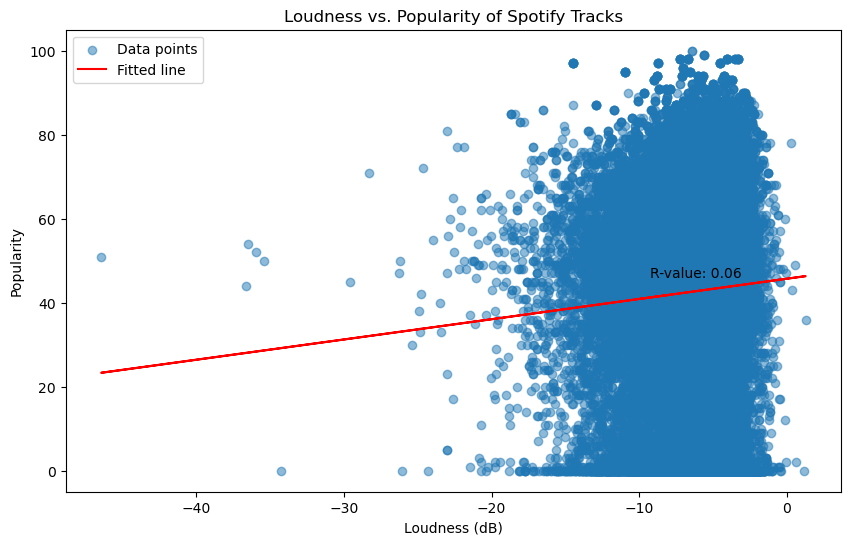

In [24]:
# Scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['Loudness'], spotify_df['Popularity'], alpha=0.5, label='Data points')
plt.plot(spotify_df['Loudness'], intercept + slope*spotify_df['Loudness'], 'r', label='Fitted line')
loudness_mid_point = np.median(spotify_df['Loudness'])
popularity_at_mid_point = intercept + slope * loudness_mid_point
plt.annotate(f'R-value: {r_value:.2f}', (loudness_mid_point, popularity_at_mid_point), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Loudness vs. Popularity of Spotify Tracks')
plt.xlabel('Loudness (dB)')
plt.ylabel('Popularity')
plt.legend()
plt.show()

In [25]:
print(f'Correlation Coefficient (r value): {r_value:.2f}')

Correlation Coefficient (r value): 0.06


In [26]:
print(f'Regression Formula: Popularity = {intercept:.2f} + ({slope:.2f}) * Loudness')

Regression Formula: Popularity = 45.72 + (0.48) * Loudness


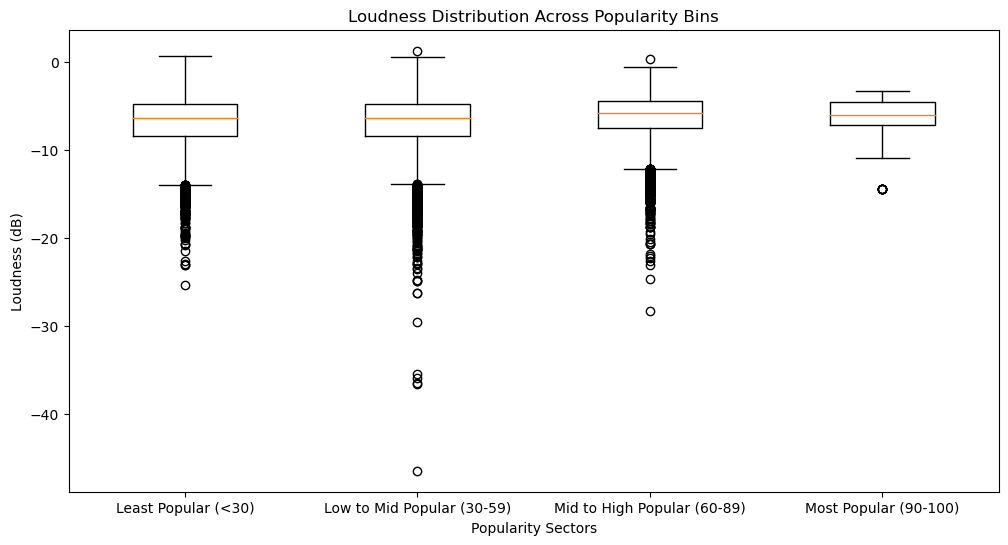

In [18]:
# Box plot for loudness across popularity bins
plt.figure(figsize=(12, 6))
plt.boxplot([spotify_df[spotify_df['Popularity Sectors'] == label]['Loudness'] for label in labels], labels=labels)
plt.title('Loudness Distribution Across Popularity Bins')
plt.ylabel('Loudness (dB)')
plt.xlabel('Popularity Sectors')
plt.show()

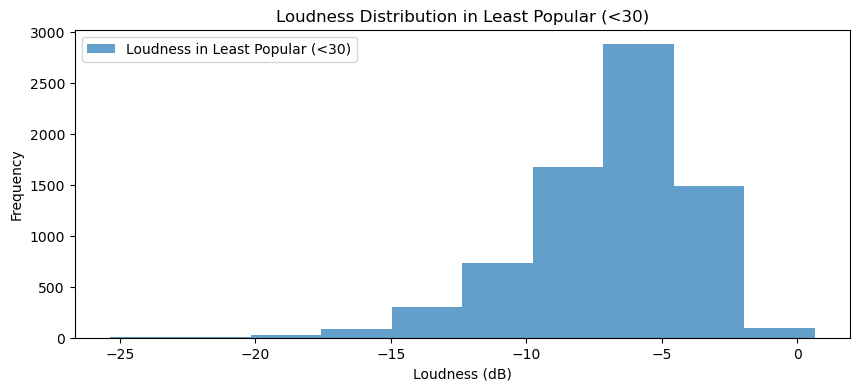

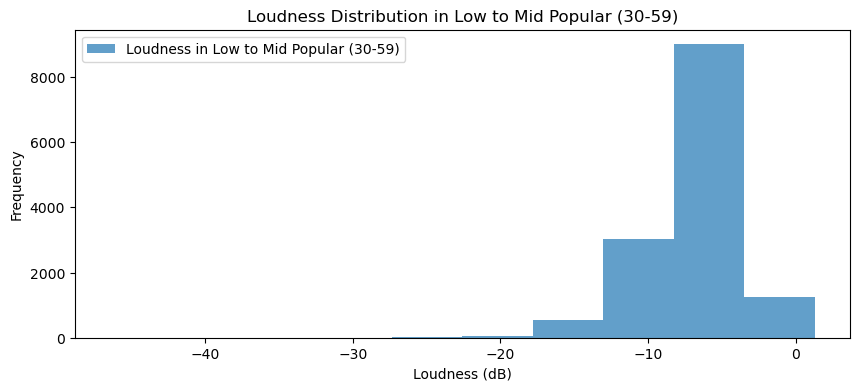

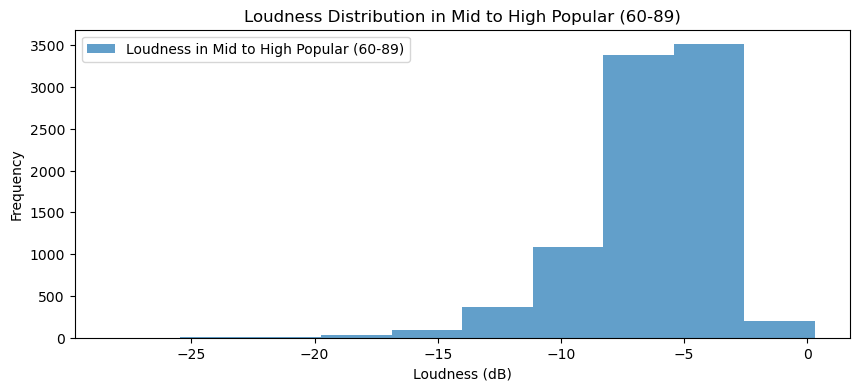

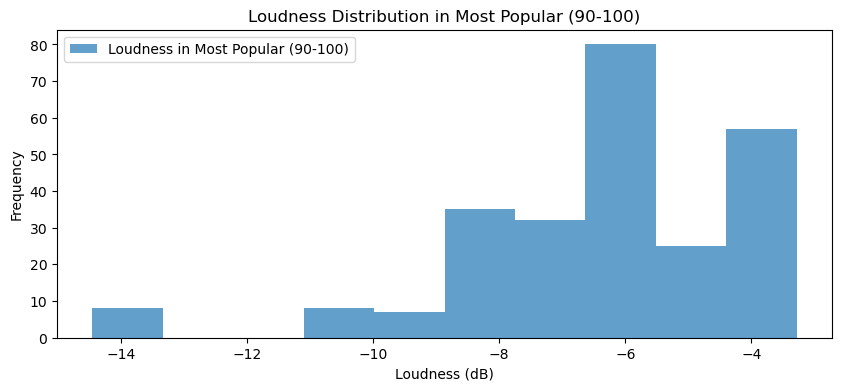

In [19]:
# Histograms for loudness in each popularity bin
for label in labels:
    subset = spotify_df[spotify_df['Popularity Sectors'] == label]
    plt.figure(figsize=(10, 4))
    plt.hist(subset['Loudness'], bins=10, alpha=0.7, label=f'Loudness in {label}')
    plt.title(f'Loudness Distribution in {label}')
    plt.xlabel('Loudness (dB)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()